#**AI in Industry**

**Author**: Jyoti Yadav

**Date**: March 2022

**Email**: jyoti.yadav@studio.unibo.it

##Preliminary Steps

In [83]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys 
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation
import matplotlib.pyplot as plt

it is necessary, to clean all the data that are in the DATASETS directory and wipe out all the subdirectories.

In [84]:
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")

Current work directory: /content
Cleaned


##Dataset Download

In [85]:
from urllib import request
import gzip

# Config
print("Current work directory: {}".format(os.getcwd()))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = "https://github.com/jyotiyadav94/Ai-in-industry/raw/main/new_data/r205n13.gzip"

dataset_path = os.path.join(dataset_folder, "r205n12.gzip")

print(dataset_path)

def download_dataset(download_path: str, url: str):
    if not os.path.exists(download_path):
        print("Downloading dataset...")
        request.urlretrieve(url, download_path)
        print("Download complete!")


def extract_dataset(download_path: str, extract_path: str):
    data = pd.read_parquet('/content/Datasets/r205n12.gzip')
    print("Extraction completed!")
    return data

# Download
download_dataset(dataset_path, url)

#Extraction
df=extract_dataset(dataset_path, dataset_folder)


Current work directory: /content
/content/Datasets/r205n12.gzip
Download complete!
Extraction completed!


In [86]:
df.head(5)

,timestamp,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,var:dimm10_temp,max:dimm10_temp,min:dimm10_temp,avg:dimm11_temp,var:dimm11_temp,max:dimm11_temp,min:dimm11_temp,avg:dimm12_temp,var:dimm12_temp,max:dimm12_temp,min:dimm12_temp,avg:dimm13_temp,var:dimm13_temp,max:dimm13_temp,min:dimm13_temp,avg:dimm14_temp,var:dimm14_temp,max:dimm14_temp,min:dimm14_temp,avg:dimm15_temp,var:dimm15_temp,max:dimm15_temp,min:dimm15_temp,avg:dimm1_temp,var:dimm1_temp,max:dimm1_temp,min:dimm1_temp,avg:dimm2_temp,var:dimm2_temp,max:dimm2_temp,...,max:mem_free,min:mem_free,avg:mem_shared,var:mem_shared,max:mem_shared,min:mem_shared,avg:mem_total,var:mem_total,max:mem_total,min:mem_total,avg:part_max_used,var:part_max_used,max:part_max_used,min:part_max_used,avg:pkts_in,var:pkts_in,max:pkts_in,min:pkts_in,avg:pkts_out,var:pkts_out,max:pkts_out,min:pkts_out,avg:proc_run,var:proc_run,max:proc_run,min:proc_run,avg:proc_total,var:proc_total,max:proc_total,min:proc_total,avg:swap_free,var:swap_free,max:swap_free,min:swap_free,avg:swap_total,var:swap_total,max:swap_total,min:swap_total,label,New_label
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13218,2020-07-16 19:30:00,23.493333,0.067810,23.8,23.0,29.133333,0.123810,30,29,31.6,0.257143,32,31,31.0,0.0,31,31,32.000000,0.000000,32,32,32.0,0.0,32,32,31.0,0.0,31,31,33.000000,0.000000,33,33,29.400000,0.257143,30,29,29.266667,0.209524,30,...,324712704.0,324476992.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,137.935,2150.332967,186.28,90.38,96.085,273.935767,120.89,87.21,0.0,0.0,0,0,1297.000000,32.000000,1301,1293,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0,2
13221,2020-07-16 19:45:00,25.573333,0.027810,25.8,25.4,30.800000,0.171429,31,30,33.0,0.000000,33,33,32.0,0.0,32,32,32.400000,0.257143,33,32,33.0,0.0,33,33,32.0,0.0,32,32,33.133333,0.123810,34,33,31.000000,0.000000,31,31,31.000000,0.000000,31,...,324400384.0,324383360.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,113.280,2796.024200,150.67,75.89,42.540,0.192200,42.85,42.23,0.0,0.0,0,0,1238.500000,0.500000,1239,1238,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0,2
13278,2020-07-17 00:30:00,21.569231,0.018974,21.8,21.4,27.000000,0.000000,27,27,31.0,0.000000,31,31,30.0,0.0,30,30,32.846154,0.141026,33,32,33.0,0.0,33,33,32.0,0.0,32,32,33.846154,0.141026,34,33,28.000000,0.000000,28,28,27.230769,0.192308,28,...,318447552.0,318424384.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,70.180,0.000000,70.18,70.18,42.730,0.000000,42.73,42.73,0.0,0.0,0,0,1631.666667,2.333333,1633,1630,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0,0
13281,2020-07-17 00:45:00,21.600000,0.022857,21.8,21.4,27.000000,0.000000,27,27,31.0,0.000000,31,31,30.0,0.0,30,30,33.000000,0.000000,33,33,33.0,0.0,33,33,32.0,0.0,32,32,34.000000,0.000000,34,34,27.933333,0.066667,28,27,27.066667,0.066667,28,...,318442112.0,318438656.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,49.170,0.000000,49.17,49.17,43.400,0.000000,43.40,43.40,0.0,0.0,0,0,1629.000000,0.000000,1629,1629,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0,0
13284,2020-07-17 01:00:00,21.280000,0.021714,21.4,21.0,27.000000,0.000000,27,27,31.0,0.000000,31,31,30.0,0.0,30,30,32.333333,0.238095,33,32,33.0,0.0,33,33,32.0,0.0,32,32,33.400000,0.257143,34,33,27.133333,0.123810,28,27,27.000000,0.000000,27,...,318438656.0,318416768.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,121.710,11512.757100,245.36,53.12,45.960,8.533200,49.22,43.58,0.0,0.0,0,0,1633.000000,8.000000,1635,1631,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0,0


## Data Analysis

In [87]:
df.isnull().values.any()

False

In [88]:
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
timestamp,0,0.0
avg:ambient,0,0.0
var:ambient,0,0.0
max:ambient,0,0.0
min:ambient,0,0.0
...,...,...
var:swap_total,0,0.0
max:swap_total,0,0.0
min:swap_total,0,0.0
label,0,0.0


In [89]:
df['New_label'].value_counts()

0    9197
2     785
Name: New_label, dtype: int64

In [90]:
print("No. of unique labels ", len(df['New_label'].unique()))
print("Label values ",df.New_label.unique())

No. of unique labels  2
Label values  [2 0]


## Imabalanced dataset

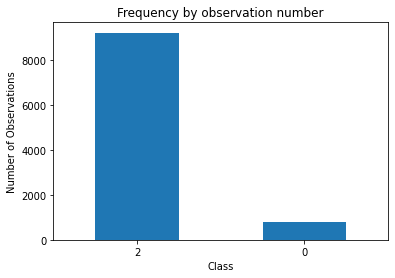

In [91]:
count_classes = pd.value_counts(df['New_label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(len(df['New_label'].unique())), df.New_label.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

## check if label column and New_label both contains the same values

In [94]:
df['label'].equals(df['New_label'])
df.drop('label', axis=1, inplace=True)

In [95]:
df

,timestamp,avg:ambient,var:ambient,max:ambient,min:ambient,avg:dimm0_temp,var:dimm0_temp,max:dimm0_temp,min:dimm0_temp,avg:dimm10_temp,var:dimm10_temp,max:dimm10_temp,min:dimm10_temp,avg:dimm11_temp,var:dimm11_temp,max:dimm11_temp,min:dimm11_temp,avg:dimm12_temp,var:dimm12_temp,max:dimm12_temp,min:dimm12_temp,avg:dimm13_temp,var:dimm13_temp,max:dimm13_temp,min:dimm13_temp,avg:dimm14_temp,var:dimm14_temp,max:dimm14_temp,min:dimm14_temp,avg:dimm15_temp,var:dimm15_temp,max:dimm15_temp,min:dimm15_temp,avg:dimm1_temp,var:dimm1_temp,max:dimm1_temp,min:dimm1_temp,avg:dimm2_temp,var:dimm2_temp,max:dimm2_temp,...,var:mem_free,max:mem_free,min:mem_free,avg:mem_shared,var:mem_shared,max:mem_shared,min:mem_shared,avg:mem_total,var:mem_total,max:mem_total,min:mem_total,avg:part_max_used,var:part_max_used,max:part_max_used,min:part_max_used,avg:pkts_in,var:pkts_in,max:pkts_in,min:pkts_in,avg:pkts_out,var:pkts_out,max:pkts_out,min:pkts_out,avg:proc_run,var:proc_run,max:proc_run,min:proc_run,avg:proc_total,var:proc_total,max:proc_total,min:proc_total,avg:swap_free,var:swap_free,max:swap_free,min:swap_free,avg:swap_total,var:swap_total,max:swap_total,min:swap_total,New_label
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13218,2020-07-16 19:30:00,23.493333,0.067810,23.8,23.0,29.133333,0.123810,30,29,31.600000,0.257143,32,31,31.0,0.0,31,31,32.000000,0.000000,32,32,32.0,0.0,32,32,31.0,0.0,31,31,33.000000,0.000000,33,33,29.400000,0.257143,30,29,29.266667,0.209524,30,...,1.465271e+10,324712704.0,324476992.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,137.935,2150.332967,186.28,90.38,96.085,273.935767,120.89,87.21,0.000000,0.000000,0,0,1297.000000,32.000000,1301,1293,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,2
13221,2020-07-16 19:45:00,25.573333,0.027810,25.8,25.4,30.800000,0.171429,31,30,33.000000,0.000000,33,33,32.0,0.0,32,32,32.400000,0.257143,33,32,33.0,0.0,33,33,32.0,0.0,32,32,33.133333,0.123810,34,33,31.000000,0.000000,31,31,31.000000,0.000000,31,...,7.933679e+07,324400384.0,324383360.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,113.280,2796.024200,150.67,75.89,42.540,0.192200,42.85,42.23,0.000000,0.000000,0,0,1238.500000,0.500000,1239,1238,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,2
13278,2020-07-17 00:30:00,21.569231,0.018974,21.8,21.4,27.000000,0.000000,27,27,31.000000,0.000000,31,31,30.0,0.0,30,30,32.846154,0.141026,33,32,33.0,0.0,33,33,32.0,0.0,32,32,33.846154,0.141026,34,33,28.000000,0.000000,28,28,27.230769,0.192308,28,...,1.065411e+08,318447552.0,318424384.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,70.180,0.000000,70.18,70.18,42.730,0.000000,42.73,42.73,0.000000,0.000000,0,0,1631.666667,2.333333,1633,1630,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0
13281,2020-07-17 00:45:00,21.600000,0.022857,21.8,21.4,27.000000,0.000000,27,27,31.000000,0.000000,31,31,30.0,0.0,30,30,33.000000,0.000000,33,33,33.0,0.0,33,33,32.0,0.0,32,32,34.000000,0.000000,34,34,27.933333,0.066667,28,27,27.066667,0.066667,28,...,2.249933e+06,318442112.0,318438656.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,49.170,0.000000,49.17,49.17,43.400,0.000000,43.40,43.40,0.000000,0.000000,0,0,1629.000000,0.000000,1629,1629,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0
13284,2020-07-17 01:00:00,21.280000,0.021714,21.4,21.0,27.000000,0.000000,27,27,31.000000,0.000000,31,31,30.0,0.0,30,30,32.333333,0.238095,33,32,33.0,0.0,33,33,32.0,0.0,32,32,33.400000,0.257143,34,33,27.133333,0.123810,28,27,27.000000,0.000000,27,...,1.081008e+08,318438656.0,318416768.0,0,0.0,0,0,329873088.0,0.0,329873088.0,329873088.0,29.3,0.0,29.3,29.3,121.710,11512.757100,245.36,53.12,45.960,8.533200,49.22,43.58,0.000000,0.000000,0,0,1633.000000,8.000000,1635,1631,4194240.0,0.0,4194240,4194240,4194240,0.0,4194240,4194240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..